## Introduction

**Last Updated**: 03/09/2024

**Embedded Capacity Register**: For each DNO/IDNO Party, this refers to a register of site-specific data items for sites connected to the DNO/IDNO Party's Distribution System (or those with an accepted connection offer), which: 

(a) Have an import capacity of any size and are subject to a DSR Contract of 50kW or more; and/or  
(b) Have an export capacity of any size and a registered capacity of 50kW or more.  

The required register format and data items are described in Schedule 31 (Embedded Capacity Register).

This Embedded Capacity Register (ECR) includes details of connected generation (including storage) and flexible demand resources connected to the DNO/IDNO's Distribution System.

**Generation assets** are included if the registered capacity is greater than or equal to 50kW.  
**Sites providing Demand Side Response (DSR)** are included if the contracted capacity is greater than or equal to 50kW.

The ECR is divided into two parts:

- **Part 1**: Provides information on generation (including storage) assets.
- **Part 2**: Provides information on demand sites offering Demand Side Response (DSR) services.

The sheets that make up the ECR are:

- **Definitions Part 1**: Describes the different data fields used in Part 1 of the ECR.
- **Register Part 1**: Comprises a list of generation (including storage) assets.
- **Definitions Part 2 (DSR)**: Describes the different data fields used in Part 2 of the ECR.
- **Register Part 2**: Comprises a list of demand sites providing DSR services.

<br></br>

[Note]: Features description is found [here]('EmbeddedCapacityRegister/features.md')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st
import geopandas as gpd

Get Module Verions

In [2]:
import matplotlib, plotly
for mod in [pd, np, matplotlib, st, plotly, gpd]:
    print(f'{mod.__name__}=={mod.__version__}')

pandas==2.2.2
numpy==1.26.4
matplotlib==3.9.2
streamlit==1.38.0
plotly==5.24.0
geopandas==1.0.1


## Loading Process

**Sheets Loaded**
The workbook contains the following sheets, which have been loaded into a pandas DataFrame:

- **sheet index 2**. Register Part 1 50kW - <1MW
   - **Description:** This sheet includes data related to energy connections with capacities ranging from 50 kW to less than 1 MW.

 - **sheet index 3**. Register Part 1 - ≥1MW
   - **Description:** This sheet includes data for energy connections with capacities of 1 MW or greater.

**Data Structure**
- **Header Row:** The second row of each sheet is used as the header, which defines the column names for the data.
- **Combined Data:** The data from both sheets has been concatenated into a single DataFrame (by adding 1 under 2) for analysis, allowing for a comprehensive view of all connections across the specified capacity ranges.

In [3]:
df_dict = pd.read_excel("./datastore/nged ecr sep 2024.xlsx", sheet_name=[2,3], header=1)
type(df_dict)

dict

In [4]:
df_dict.keys()

dict_keys([2, 3])

## Preprocessing

Here, columns will be renamed for ease of use

Combine data to one

In [5]:
raw_data = pd.concat([df_dict[2], df_dict[3]])
raw_data.shape

(6312, 50)

In [6]:
raw_data.head()

Export MPAN / MSID   Town/ City          County   \
0      1170000124890      Spalding    Lincolnshire   
1      1170001725100      Spalding    Lincolnshire   
2      1170001870001      Spalding    Lincolnshire   
3      1170000386383        Boston    Lincolnshire   
4      1170000165637  Peterborough  Cambridgeshire   

  Location (X-coordinate):Eastings (where data is held)  \
0                                             521470      
1                                             520170      
2                                             548330      
3                                             521680      
4                                             514070      

  Location (y-coordinate):Northings (where data is held)    Grid Supply Point  \
0                                             316790      Walpole 132Kv S Stn   
1                                             314820      Walpole 132Kv S Stn   
2                                             321730      Walpole 132Kv S Stn   
3                                             349910      Walpole 132Kv S Stn   
4                                             316420      Walpole 132Kv S Stn   

               Bulk Supply Point                       Primary  \
0  Spalding Clay Lake 33Kv S Stn        Crowland 33 11Kv S Stn   
1  Spalding Clay Lake 33Kv S Stn        Crowland 33 11Kv S Stn   
2       South Holland 33Kv S Stn     Long Sutton 33 11Kv S Stn   
3              Boston 33Kv S Stn        Langrick 33 11Kv S Stn   
4            Stamford 33Kv S Stn  Market Deeping 33 11Kv S Stn   

   Point of Connection (POC)\nVoltage (kV)  \
0                                      0.4   
1                                      0.4   
2                                      0.4   
3                                      0.4   
4                                      0.4   

                                       Licence Area   ...  \
0  National Grid Electricity Distribution (East M...  ...   
1  National Grid Electricity Distribution (East M...  ...   
2  National Grid Electricity Distribution (East M...  ...   
3  National Grid Electricity Distribution (East M...  ...   
4  National Grid Electricity Distribution (East M...  ...   

  Change to Maximum Import Capacity (MVA)  Date Accepted  \
0                                      NaN           NaN   
1                                      NaN           NaN   
2                                      NaN           NaN   
3                                      NaN           NaN   
4                                      NaN           NaN   

  Target Energisation Date  Distribution Service Provider (Y/N)  \
0                      NaT                                  NaN   
1                      NaT                                  NaN   
2                      NaT                                  NaN   
3                      NaT                                  NaN   
4                      NaT                                  NaN   

   Transmission Service Provider (Y/N)  Reference In a Connection Queue (Y/N)  \
0                                  NaN        NaN                         NaN   
1                                  NaN        NaN                         NaN   
2                                  NaN        NaN                         NaN   
3                                  NaN        NaN                         NaN   
4                                  NaN        NaN                         NaN   

  Distribution Reinforcement Reference Transmission Reinforcement Reference  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   Last Updated  
0    2024-09-03  
1    2024-09-03  
2    2024-09-0

In [7]:
raw_data.columns

Index(['Export MPAN / MSID', 'Town/ City ', 'County ',
       'Location (X-coordinate):Eastings (where data is held)',
       'Location (y-coordinate):Northings (where data is held)',
       'Grid Supply Point', 'Bulk Supply Point', 'Primary',
       'Point of Connection (POC)\nVoltage (kV)', 'Licence Area ',
       'Energy Source 1', 'Energy Conversion Technology 1',
       'CHP Cogeneration (Yes/No)', 'Storage Capacity 1 (MWh)',
       'Storage Duration 1 (Hours)',
       'Energy Source & Energy Conversion Technology 1 - Registered Capacity (MW)',
       'Energy Source 2', 'Energy Conversion Technology 2',
       'CHP Cogeneration 2 (Yes/No)', 'Storage Capacity 2 (MWh)',
       'Storage Duration 2 (Hours)',
       'Energy Source & Energy Conversion Technology 2 - Registered Capacity (MW)',
       'Energy Source 3', 'Energy Conversion Technology 3',
       'CHP Cogeneration 3 (Yes/No)', 'Storage Capacity 3 (MWh)',
       'Storage Duration 3 (Hours)',
       'Energy Source & Energy Con

Remove extract space from feature names

In [8]:
raw_data.columns = [col.strip() for col in raw_data.columns]
raw_data.columns

Index(['Export MPAN / MSID', 'Town/ City', 'County',
       'Location (X-coordinate):Eastings (where data is held)',
       'Location (y-coordinate):Northings (where data is held)',
       'Grid Supply Point', 'Bulk Supply Point', 'Primary',
       'Point of Connection (POC)\nVoltage (kV)', 'Licence Area',
       'Energy Source 1', 'Energy Conversion Technology 1',
       'CHP Cogeneration (Yes/No)', 'Storage Capacity 1 (MWh)',
       'Storage Duration 1 (Hours)',
       'Energy Source & Energy Conversion Technology 1 - Registered Capacity (MW)',
       'Energy Source 2', 'Energy Conversion Technology 2',
       'CHP Cogeneration 2 (Yes/No)', 'Storage Capacity 2 (MWh)',
       'Storage Duration 2 (Hours)',
       'Energy Source & Energy Conversion Technology 2 - Registered Capacity (MW)',
       'Energy Source 3', 'Energy Conversion Technology 3',
       'CHP Cogeneration 3 (Yes/No)', 'Storage Capacity 3 (MWh)',
       'Storage Duration 3 (Hours)',
       'Energy Source & Energy Conver

In [9]:

try:
	raw_data.rename(columns={'Location (X-coordinate):Eastings (where data is held)': 'Eastings',
						  	 'Export MPAN / MSID': 'Export MPAN_MSID',
                         	 'Location (y-coordinate):Northings (where data is held)': 'Northings',
							 'Point of Connection (POC)\nVoltage (kV)': 'PoC Voltage (KV)',
							 'Energy Source & Energy Conversion Technology 1 - Registered Capacity (MW)': 'Reg_Cap_Energy_Source_Conv_Tech_1',
							 'Energy Source & Energy Conversion Technology 2 - Registered Capacity (MW)': 'Reg_Cap_Energy_Source_Conv_Tech_2',
							 'Town/ City': 'Town_City', 'Export MPAN / MSID': 'Export MPAN_MSID', 'Import MPAN / MSID': 'Import MPAN_MSID',
							 'Energy Source & Energy Conversion Technology 3 - Registered Capacity (MW)': 'Reg_Cap_Energy_Source_Conv_Tech_3'
                         },
                         inplace=True)

	# raw_data.drop(labels=['Location (X-coordinate):\nEastings (where data is held)', 'Location (y-coordinate):\nNorthings (where data is held)'],
	# 					axis=1,
	# 					inplace=True)
except KeyError:
	print('Columns already renamed\n')
raw_data.columns

Index(['Export MPAN_MSID', 'Town_City', 'County', 'Eastings', 'Northings',
       'Grid Supply Point', 'Bulk Supply Point', 'Primary', 'PoC Voltage (KV)',
       'Licence Area', 'Energy Source 1', 'Energy Conversion Technology 1',
       'CHP Cogeneration (Yes/No)', 'Storage Capacity 1 (MWh)',
       'Storage Duration 1 (Hours)', 'Reg_Cap_Energy_Source_Conv_Tech_1',
       'Energy Source 2', 'Energy Conversion Technology 2',
       'CHP Cogeneration 2 (Yes/No)', 'Storage Capacity 2 (MWh)',
       'Storage Duration 2 (Hours)', 'Reg_Cap_Energy_Source_Conv_Tech_2',
       'Energy Source 3', 'Energy Conversion Technology 3',
       'CHP Cogeneration 3 (Yes/No)', 'Storage Capacity 3 (MWh)',
       'Storage Duration 3 (Hours)', 'Reg_Cap_Energy_Source_Conv_Tech_3',
       'Flexible Connection (Yes/No)', 'Connection Status',
       'Already connected Registered Capacity (MW)',
       'Maximum Export Capacity (MW)', 'Maximum Export Capacity (MVA)',
       'Maximum Import Capacity (MW)', 'Maximu

In [10]:
raw_data.set_index('Export MPAN_MSID', inplace=True)

Rename Licence Area fields

In [11]:
def rename_LA_fields(area: str):
    match area:
        case 'National Grid Electricity Distribution (East Midlands) Plc':
            return 'East Midlands'
        case 'National Grid Electricity Distribution (West Midlands) Plc':
            return 'West Midlands'
        case 'National Grid Electricity Distribution (South West) Plc':
            return 'South West'
        case 'National Grid Electricity Distribution (South Wales) Plc':
            return 'South Wales'
        case _:
            return pd.NA
        
    

raw_data['Licence Area'] = raw_data['Licence Area'].apply(rename_LA_fields)

In [12]:
raw_data['Licence Area'].value_counts()

Licence Area
East Midlands    2094
West Midlands    1704
South West       1672
South Wales       842
Name: count, dtype: int64

In [13]:
raw_data.head()

Town_City          County Eastings Northings  \
Export MPAN_MSID                                                    
1170000124890         Spalding    Lincolnshire   521470    316790   
1170001725100         Spalding    Lincolnshire   520170    314820   
1170001870001         Spalding    Lincolnshire   548330    321730   
1170000386383           Boston    Lincolnshire   521680    349910   
1170000165637     Peterborough  Cambridgeshire   514070    316420   

                    Grid Supply Point              Bulk Supply Point  \
Export MPAN_MSID                                                       
1170000124890     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001725100     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001870001     Walpole 132Kv S Stn       South Holland 33Kv S Stn   
1170000386383     Walpole 132Kv S Stn              Boston 33Kv S Stn   
1170000165637     Walpole 132Kv S Stn            Stamford 33Kv S Stn   

                                       Primary  PoC Voltage (KV)  \
Export MPAN_MSID                                                   
1170000124890           Crowland 33 11Kv S Stn               0.4   
1170001725100           Crowland 33 11Kv S Stn               0.4   
1170001870001        Long Sutton 33 11Kv S Stn               0.4   
1170000386383           Langrick 33 11Kv S Stn               0.4   
1170000165637     Market Deeping 33 11Kv S Stn               0.4   

                   Licence Area Energy Source 1  ...  \
Export MPAN_MSID                                 ...   
1170000124890     East Midlands           Solar  ...   
1170001725100     East Midlands           Solar  ...   
1170001870001     East Midlands           Solar  ...   
1170000386383     East Midlands           Solar  ...   
1170000165637     East Midlands           Solar  ...   

                 Change to Maximum Import Capacity (MVA) Date Accepted  \
Export MPAN_MSID                                                         
1170000124890                                        NaN           NaN   
1170001725100                                        NaN           NaN   
1170001870001                                        NaN           NaN   
1170000386383                                        NaN           NaN   
1170000165637                                        NaN           NaN   

                  Target Energisation Date  \
Export MPAN_MSID                             
1170000124890                          NaT   
1170001725100                          NaT   
1170001870001                          NaT   
1170000386383                          NaT   
1170000165637                          NaT   

                  Distribution Service Provider (Y/N)  \
Export MPAN_MSID                                        
1170000124890                                     NaN   
1170001725100                                     NaN   
1170001870001                                     NaN   
1170000386383                                     NaN   
1170000165637                                     NaN   

                  Transmission Service Provider (Y/N) Reference  \
Export MPAN_MSID                                                  
1170000124890                                     NaN       NaN   
1170001725100                                     NaN       NaN   
1170001870001                                     NaN       NaN   
1170000386383                                     NaN       NaN   
1170000165637                                     NaN       NaN   

                 In a Connection Queue (Y/N)  \
Export MPAN_MSID                               
1170000124890                            NaN   
1170001725100                            NaN   
1170001870001                            NaN   
1170000386383                            NaN   
1170000165637                            NaN   

                 Distribution Reinforcement Reference  \
Export MPAN_MSID                                        

### Missing Values

Looking at features with all values missing

Flexible connection

In [14]:
raw_data['Flexible Connection (Yes/No)'].value_counts()

Series([], Name: count, dtype: int64)

Storage Duration

In [15]:
print(f"{raw_data['Storage Duration 1 (Hours)'].value_counts()}\n\n{raw_data['Storage Duration 2 (Hours)'].value_counts()}\n\n{raw_data['Storage Duration 3 (Hours)'].value_counts()}")

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)


Storage Capacity

In [16]:
print(f"{raw_data['Storage Capacity 1 (MWh)'].value_counts()}\n\n{raw_data['Storage Capacity 2 (MWh)'].value_counts()}\n\n{raw_data['Storage Capacity 3 (MWh)'].value_counts()}")

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)


Same goes for:
- Distribution Service Provider (Y/N)
- Transmission Service Provider (Y/N)
- Reference
- In a Connection Queue (Y/N)
- Distribution Reinforcement Reference
- Transmission Reinforcement Reference

So these 13 features will be dropped.

First change 'data not available' to `np.nan`

In [17]:

# Strip extra whitespace from all string columns
raw_data = raw_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

raw_data.replace(r'(?i)--REDACTED--', np.nan, inplace=True, regex=True)
raw_data.head(4)

C:\Users\abume\AppData\Local\Temp\ipykernel_18800\2845294706.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  raw_data = raw_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\abume\AppData\Local\Temp\ipykernel_18800\2845294706.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_data.replace(r'(?i)--REDACTED--', np.nan, inplace=True, regex=True)


Town_City        County  Eastings  Northings  \
Export MPAN_MSID                                                
1170000124890     Spalding  Lincolnshire  521470.0   316790.0   
1170001725100     Spalding  Lincolnshire  520170.0   314820.0   
1170001870001     Spalding  Lincolnshire  548330.0   321730.0   
1170000386383       Boston  Lincolnshire  521680.0   349910.0   

                    Grid Supply Point              Bulk Supply Point  \
Export MPAN_MSID                                                       
1170000124890     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001725100     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001870001     Walpole 132Kv S Stn       South Holland 33Kv S Stn   
1170000386383     Walpole 132Kv S Stn              Boston 33Kv S Stn   

                                    Primary  PoC Voltage (KV)   Licence Area  \
Export MPAN_MSID                                                               
1170000124890        Crowland 33 11Kv S Stn               0.4  East Midlands   
1170001725100        Crowland 33 11Kv S Stn               0.4  East Midlands   
1170001870001     Long Sutton 33 11Kv S Stn               0.4  East Midlands   
1170000386383        Langrick 33 11Kv S Stn               0.4  East Midlands   

                 Energy Source 1  ... Change to Maximum Import Capacity (MVA)  \
Export MPAN_MSID                  ...                                           
1170000124890              Solar  ...                                     NaN   
1170001725100              Solar  ...                                     NaN   
1170001870001              Solar  ...                                     NaN   
1170000386383              Solar  ...                                     NaN   

                 Date Accepted  Target Energisation Date  \
Export MPAN_MSID                                           
1170000124890              NaN                       NaT   
1170001725100              NaN                       NaT   
1170001870001              NaN                       NaT   
1170000386383              NaN                       NaT   

                  Distribution Service Provider (Y/N)  \
Export MPAN_MSID                                        
1170000124890                                     NaN   
1170001725100                                     NaN   
1170001870001                                     NaN   
1170000386383                                     NaN   

                  Transmission Service Provider (Y/N) Reference  \
Export MPAN_MSID                                                  
1170000124890                                     NaN       NaN   
1170001725100                                     NaN       NaN   
1170001870001                                     NaN       NaN   
1170000386383                                     NaN       NaN   

                 In a Connection Queue (Y/N)  \
Export MPAN_MSID                               
1170000124890                            NaN   
1170001725100                            NaN   
1170001870001                            NaN   
1170000386383                            NaN   

                 Distribution Reinforcement Reference  \
Export MPAN_MSID                                        
1170000124890                                     NaN   
1170001725100                                     NaN   
1170001870001                                     NaN   
1170000386383                                     NaN   

                  Transmission Reinforcement Reference  Last Updated  
Export MPAN_MSID                                                      
1170000124890                                      NaN    2024-09-03  
1170001725100                                      NaN    2024-09-03  
1170001870001                                      NaN    2024-09-03  
1170000386383                                      NaN    2024-09-03  

[4 rows x 49 columns]

### Change data types

Change `object` to accurate types - `float`, `date`


In [18]:
# to float
selected_floats = ['PoC Voltage (KV)',
				   'Maximum Export Capacity (MW)', 'Maximum Import Capacity (MW)',
				   'Maximum Export Capacity (MVA)', 'Maximum Import Capacity (MVA)',
                   'Already connected Registered Capacity (MW)', 'Accepted to Connect Registered Capacity (MW)',
				   'Reg_Cap_Energy_Source_Conv_Tech_2', 'Reg_Cap_Energy_Source_Conv_Tech_3']

# to int
selected_ints = ['Eastings', 'Northings']

# to date
selected_dates = ['Date Connected', 'Last Updated', 'Date Accepted', 'Target Energisation Date']

raw_data[selected_floats] = raw_data[selected_floats].astype('float')
raw_data[selected_ints] = raw_data[selected_ints].apply(pd.to_numeric, errors='coerce')
raw_data['Date Accepted'] = pd.to_datetime(raw_data['Date Accepted'], format='%d/%m/%Y', errors='coerce')

raw_data.sample(5)

Town_City           County  Eastings  Northings  \
Export MPAN_MSID                                                    
1160001253321     Mansfield  Nottinghamshire  457970.0   358090.0   
1170000289040       Bedford     Bedfordshire       NaN        NaN   
2100041276689      Caldicot              NaN  348180.0   187980.0   
1470000086095     Brimfield              NaN       NaN        NaN   
NaN                Brixorth      Northampton  474728.0   269848.0   

                         Grid Supply Point            Bulk Supply Point  \
Export MPAN_MSID                                                          
1160001253321     Chesterfield 132Kv S Stn         Mansfield 33Kv S Stn   
1170000289040          Grendon 132Kv S Stn    Wellingborough 33Kv S Stn   
2100041276689                     Uskmouth                     Sudbrook   
1470000086095     Bishops Wood 132Kv S Stn          Hereford 66Kv S Stn   
NaN                    Grendon 132Kv S Stn  Northampton West 33Kv S Stn   

                                        Primary  PoC Voltage (KV)  \
Export MPAN_MSID                                                    
1160001253321                               NaN              33.0   
1170000289040             Harrold 33 11Kv S Stn               0.4   
2100041276689                          Caldicot               0.4   
1470000086095          Woofferton 66 11Kv S Stn               0.4   
NaN               Chapel Brampton 33 11Kv S Stn              11.0   

                   Licence Area Energy Source 1  ...  \
Export MPAN_MSID                                 ...   
1160001253321     East Midlands            Wind  ...   
1170000289040     East Midlands           Solar  ...   
2100041276689       South Wales           Solar  ...   
1470000086095     West Midlands           Solar  ...   
NaN               East Midlands    Fossil - Gas  ...   

                 Change to Maximum Import Capacity (MVA) Date Accepted  \
Export MPAN_MSID                                                         
1160001253321                                        NaN           NaT   
1170000289040                                        NaN           NaT   
2100041276689                                        NaN           NaT   
1470000086095                                        NaN           NaT   
NaN                                              1.36842           NaT   

                  Target Energisation Date  \
Export MPAN_MSID                             
1160001253321                          NaT   
1170000289040                          NaT   
2100041276689                          NaT   
1470000086095                          NaT   
NaN                             2025-12-01   

                  Distribution Service Provider (Y/N)  \
Export MPAN_MSID                                        
1160001253321                                     NaN   
1170000289040                                     NaN   
2100041276689                                     NaN   
1470000086095                                     NaN   
NaN                                               NaN   

                  Transmission Service Provider (Y/N) Reference  \
Export MPAN_MSID                                                  
1160001253321                                     NaN       NaN   
1170000289040                                     NaN       NaN   
2100041276689                                     NaN       NaN   
1470000086095                                     NaN       NaN   
NaN                                               NaN       NaN   

                 In a Connection Queue (Y/N)  \
Export MPAN_MSID                               
1160001253321                            NaN   
1170000289040                            NaN   
2100041276689                            NaN   
1470000086095                            NaN   
NaN                                      NaN   

                 Distribution Reinforcement Reference  \
Export MPAN_MSID         

In [19]:
data = raw_data.drop(labels=['Flexible Connection (Yes/No)',
                             'Storage Capacity 1 (MWh)', 'Storage Capacity 2 (MWh)', 'Storage Capacity 2 (MWh)', 'Storage Capacity 3 (MWh)',
                             'Storage Duration 1 (Hours)', 'Storage Duration 2 (Hours)', 'Storage Duration 3 (Hours)',
                             'Distribution Service Provider (Y/N)', 'Transmission Service Provider (Y/N)',
                             'Reference',
                             'In a Connection Queue (Y/N)',
                             'Distribution Reinforcement Reference', 'Transmission Reinforcement Reference'],
                	axis=1)

data.shape

(6312, 36)

###  Export Preprocessed

Export the preproessed data to csv format for ECRapp.py

In [20]:
data.to_csv('datastore/preprocess_ecr.csv')

## EDA

Statistical exploration

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6312 entries, 1170000124890 to nan
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Town_City                                     6210 non-null   object        
 1   County                                        4020 non-null   object        
 2   Eastings                                      5258 non-null   float64       
 3   Northings                                     5258 non-null   float64       
 4   Grid Supply Point                             6253 non-null   object        
 5   Bulk Supply Point                             5703 non-null   object        
 6   Primary                                       4904 non-null   object        
 7   PoC Voltage (KV)                              6109 non-null   float64       
 8   Licence Area                                  6312 non-null   

In [22]:
data.describe().T

count  \
Eastings                                      5258.0   
Northings                                     5258.0   
PoC Voltage (KV)                              6109.0   
Reg_Cap_Energy_Source_Conv_Tech_1             6312.0   
Reg_Cap_Energy_Source_Conv_Tech_2              410.0   
Reg_Cap_Energy_Source_Conv_Tech_3               34.0   
Already connected Registered Capacity (MW)    4720.0   
Maximum Export Capacity (MW)                  4533.0   
Maximum Export Capacity (MVA)                 4533.0   
Maximum Import Capacity (MW)                  4490.0   
Maximum Import Capacity (MVA)                 4492.0   
Date Connected                                  4683   
Accepted to Connect Registered Capacity (MW)  1592.0   
Change to Maximum Export Capacity (MW)        1592.0   
Change to Maximum Export Capacity (MVA)       1592.0   
Change to Maximum Import Capacity (MW)        1325.0   
Change to Maximum Import Capacity (MVA)       1592.0   
Date Accepted                                      0   
Target Energisation Date                        1581   
Last Updated                                    6312   

                                                                       mean  \
Eastings                                                      369474.067516   
Northings                                                     312201.216812   
PoC Voltage (KV)                                                   20.57466   
Reg_Cap_Energy_Source_Conv_Tech_1                                  8.481891   
Reg_Cap_Energy_Source_Conv_Tech_2                                 10.515884   
Reg_Cap_Energy_Source_Conv_Tech_3                                  4.617641   
Already connected Registered Capacity (MW)                         2.093135   
Maximum Export Capacity (MW)                                       2.022276   
Maximum Export Capacity (MVA)                                      2.128712   
Maximum Import Capacity (MW)                                       0.602549   
Maximum Import Capacity (MVA)                                       0.63398   
Date Connected                                2016-12-27 18:50:58.039718400   
Accepted to Connect Registered Capacity (MW)                      30.237002   
Change to Maximum Export Capacity (MW)                            27.572215   
Change to Maximum Export Capacity (MVA)                           29.023385   
Change to Maximum Import Capacity (MW)                            21.745769   
Change to Maximum Import Capacity (MVA)                           19.051272   
Date Accepted                                                           NaT   
Target Energisation Date                      2025-06-18 05:16:57.836812288   
Last Updated                                  2024-09-02 23:59:59.999999744   

                                                              min  \
Eastings                                                 118310.0   
Northings                                                 20525.0   
PoC Voltage (KV)                                              0.4   
Reg_Cap_Energy_Source_Conv_Tech_1                           0.001   
Reg_Cap_Energy_Source_Conv_Tech_2                           0.005   
Reg_Cap_Energy_Source_Conv_Tech_3                            0.01   
Already connected Registered Capacity (MW)                  0.002   
Maximum Export Capacity (MW)                                  0.0   
Maximum Export Capacity (MVA)                                 0.0   
Maximum Import Capacity (MW)                              0.00095   
Maximum Import Capacity (MVA)                                 0.0   
Date Connected                                1990-01-01 00:00:00   
Accepted to Connect Registered Capacity (MW)                0.001   
Change to Maximum Export Capacity (MW)                        0.0   
Change to Maximum Export Capacity (MVA)                       0.0   
Change to Maximum Import Capacity (MW)                     0.0005   
Change to Maximum Import Capacity (MV

Target Energisation Date ranges from 2023 to 2038. Long term plan 👍

In [23]:
check = gpd.GeoDataFrame(data)
check.head()

Town_City          County  Eastings  Northings  \
Export MPAN_MSID                                                      
1170000124890         Spalding    Lincolnshire  521470.0   316790.0   
1170001725100         Spalding    Lincolnshire  520170.0   314820.0   
1170001870001         Spalding    Lincolnshire  548330.0   321730.0   
1170000386383           Boston    Lincolnshire  521680.0   349910.0   
1170000165637     Peterborough  Cambridgeshire  514070.0   316420.0   

                    Grid Supply Point              Bulk Supply Point  \
Export MPAN_MSID                                                       
1170000124890     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001725100     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001870001     Walpole 132Kv S Stn       South Holland 33Kv S Stn   
1170000386383     Walpole 132Kv S Stn              Boston 33Kv S Stn   
1170000165637     Walpole 132Kv S Stn            Stamford 33Kv S Stn   

                                       Primary  PoC Voltage (KV)  \
Export MPAN_MSID                                                   
1170000124890           Crowland 33 11Kv S Stn               0.4   
1170001725100           Crowland 33 11Kv S Stn               0.4   
1170001870001        Long Sutton 33 11Kv S Stn               0.4   
1170000386383           Langrick 33 11Kv S Stn               0.4   
1170000165637     Market Deeping 33 11Kv S Stn               0.4   

                   Licence Area Energy Source 1  ...  \
Export MPAN_MSID                                 ...   
1170000124890     East Midlands           Solar  ...   
1170001725100     East Midlands           Solar  ...   
1170001870001     East Midlands           Solar  ...   
1170000386383     East Midlands           Solar  ...   
1170000165637     East Midlands           Solar  ...   

                 Maximum Import Capacity (MVA) Date Connected  \
Export MPAN_MSID                                                
1170000124890                            0.200     2013-08-30   
1170001725100                            0.069     2023-03-15   
1170001870001                            0.150     2023-07-25   
1170000386383                            0.070     2014-06-30   
1170000165637                            0.045     2014-05-01   

                  Accepted to Connect Registered Capacity (MW)  \
Export MPAN_MSID                                                 
1170000124890                                              NaN   
1170001725100                                              NaN   
1170001870001                                              NaN   
1170000386383                                              NaN   
1170000165637                                              NaN   

                 Change to Maximum Export Capacity (MW)  \
Export MPAN_MSID                                          
1170000124890                                       NaN   
1170001725100                                       NaN   
1170001870001                                       NaN   
1170000386383                                       NaN   
1170000165637                                       NaN   

                 Change to Maximum Export Capacity (MVA)  \
Export MPAN_MSID                                           
1170000124890                                        NaN   
1170001725100                                        NaN   
1170001870001                                        NaN   
1170000386383                                        NaN   
1170000165637                                        NaN   

                 Change to Maximum Import Capacity (MW)  \
Export MPAN_MSID                                          
1170000124890                                       NaN   
1170001725100                                       NaN   
1170001870001                                       NaN   
1170000386383                                       NaN   
1170000165637                           

In [24]:
check.geometry = gpd.points_from_xy(x=check.Eastings, y=check.Northings)
check.set_crs('EPSG:27700', inplace=True).head()

C:\Users\abume\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:221: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  object.__setattr__(self, attr, val)


Town_City          County  Eastings  Northings  \
Export MPAN_MSID                                                      
1170000124890         Spalding    Lincolnshire  521470.0   316790.0   
1170001725100         Spalding    Lincolnshire  520170.0   314820.0   
1170001870001         Spalding    Lincolnshire  548330.0   321730.0   
1170000386383           Boston    Lincolnshire  521680.0   349910.0   
1170000165637     Peterborough  Cambridgeshire  514070.0   316420.0   

                    Grid Supply Point              Bulk Supply Point  \
Export MPAN_MSID                                                       
1170000124890     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001725100     Walpole 132Kv S Stn  Spalding Clay Lake 33Kv S Stn   
1170001870001     Walpole 132Kv S Stn       South Holland 33Kv S Stn   
1170000386383     Walpole 132Kv S Stn              Boston 33Kv S Stn   
1170000165637     Walpole 132Kv S Stn            Stamford 33Kv S Stn   

                                       Primary  PoC Voltage (KV)  \
Export MPAN_MSID                                                   
1170000124890           Crowland 33 11Kv S Stn               0.4   
1170001725100           Crowland 33 11Kv S Stn               0.4   
1170001870001        Long Sutton 33 11Kv S Stn               0.4   
1170000386383           Langrick 33 11Kv S Stn               0.4   
1170000165637     Market Deeping 33 11Kv S Stn               0.4   

                   Licence Area Energy Source 1  ... Date Connected  \
Export MPAN_MSID                                 ...                  
1170000124890     East Midlands           Solar  ...     2013-08-30   
1170001725100     East Midlands           Solar  ...     2023-03-15   
1170001870001     East Midlands           Solar  ...     2023-07-25   
1170000386383     East Midlands           Solar  ...     2014-06-30   
1170000165637     East Midlands           Solar  ...     2014-05-01   

                 Accepted to Connect Registered Capacity (MW)  \
Export MPAN_MSID                                                
1170000124890                                             NaN   
1170001725100                                             NaN   
1170001870001                                             NaN   
1170000386383                                             NaN   
1170000165637                                             NaN   

                  Change to Maximum Export Capacity (MW)  \
Export MPAN_MSID                                           
1170000124890                                        NaN   
1170001725100                                        NaN   
1170001870001                                        NaN   
1170000386383                                        NaN   
1170000165637                                        NaN   

                 Change to Maximum Export Capacity (MVA)  \
Export MPAN_MSID                                           
1170000124890                                        NaN   
1170001725100                                        NaN   
1170001870001                                        NaN   
1170000386383                                        NaN   
1170000165637                                        NaN   

                 Change to Maximum Import Capacity (MW)  \
Export MPAN_MSID                                          
1170000124890                                       NaN   
1170001725100                                       NaN   
1170001870001                                       NaN   
1170000386383                                       NaN   
1170000165637                                       NaN   

                 Change to Maximum Import Capacity (MVA)  Date Accepted  \
Export MPAN_MSID                                                          
1170000124890                                        NaN            NaT   
1170001725100                                        NaN            NaT   
1170001870001                  

In [34]:
fig = px.choropleth(check, geojson=check.geometry,
                    color=check['Licence Area'], color_continuous_scale=px.colors.sequential.Plasma,
                    locations=check['County'])
fig.show()

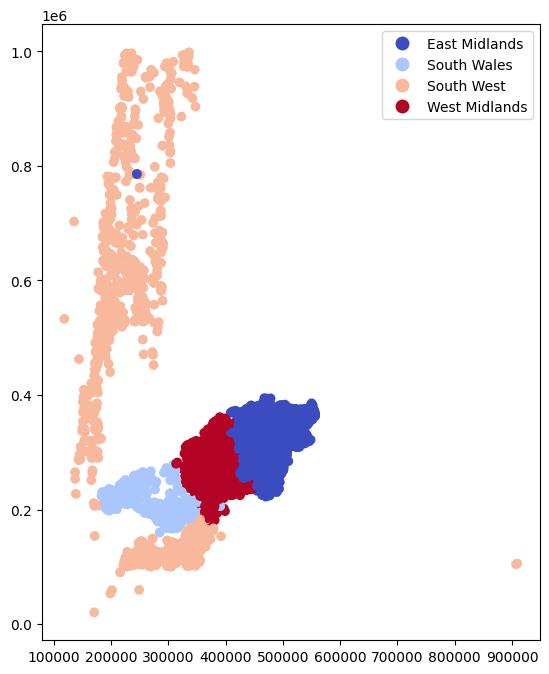

In [51]:
check.plot(column='Licence Area', figsize=(14,8), cmap='coolwarm', legend=True)
plt.show()

In [47]:
check.isna().sum()

Town_City                                        102
County                                          2292
Eastings                                        1054
Northings                                       1054
Grid Supply Point                                 59
Bulk Supply Point                                609
Primary                                         1408
PoC Voltage (KV)                                 203
Licence Area                                       0
Energy Source 1                                  218
Energy Conversion Technology 1                   218
CHP Cogeneration (Yes/No)                        446
Reg_Cap_Energy_Source_Conv_Tech_1                  0
Energy Source 2                                 5981
Energy Conversion Technology 2                  5981
CHP Cogeneration 2 (Yes/No)                     5937
Reg_Cap_Energy_Source_Conv_Tech_2               5902
Energy Source 3                                 6286
Energy Conversion Technology 3                